In [398]:
#importing required libraries
import sklearn 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

<h2>1. Load and Explore the Dataset</h2>
<h3>a. Load the Iris dataset from the sklearn.datasets module.</h3>


In [399]:
from sklearn.datasets import load_iris
iris = load_iris()


In [400]:
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Dataset description:", iris.DESCR)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Dataset description: .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal

In [401]:

# Create a DataFrame from the dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target

print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


<h3>b. Display basic information about the dataset (e.g., number of samples, features, target
classes)</h3>

In [402]:
num_samples = iris_df.shape[0]
print("No of samples in data set :", num_samples)


No of samples in data set : 150


In [403]:
num_features = len(iris.feature_names)
print("Number of features:", num_features)

Number of features: 4


In [404]:
num_unique_classes = len(iris_df['target'].unique())
print("Number of unique classes:", num_unique_classes)

Number of unique classes: 3


<h2>2. Data Preprocessing</h2>


<h3>c. Check for missing values and handle them if necessary (not typically needed for the Iris
dataset).</h3>

#checking any empty values are present in iris data set


In [405]:
any_missing_values = iris_df.isna().any()
print("Are there any missing values in the DataFrame?", any_missing_values)


Are there any missing values in the DataFrame? sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
target               False
dtype: bool


In [406]:
# there are no empty values in the iris dataset so there no need to handle any missing values.


<h3>d. Scale or normalize the features for better clustering performance.</h3>

In [407]:


scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris_df.iloc[:, :-1]) 
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=iris_df.columns[:-1])  # Excluding the target column
print(iris_scaled_df.head())
## below is the scaled df 

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


<h2>3. Clustering Algorithms</h2>

<h3>e. Clustering algorithms to apply:</h3>  

i. K-means clustering  

ii. Hierarchical clustering (Agglomerative clustering) – self-learn  

iii. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) – selflearn


<h2>4. Clustering Experimentation</h2>

<h3>f. Apply each clustering algorithm to the preprocessed dataset</h3>

In [408]:
def apply_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=101,n_init = 10)
    kmeans.fit(data)
    return kmeans.labels_

def apply_hierarchical(data, n_clusters, linkage):
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    return hierarchical.fit_predict(data)

def apply_dbscan(data, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    return dbscan.fit_predict(data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)



<h3>g. Explore different parameter settings (e.g., number of clusters for K-means, linkage
method for hierarchical clustering, epsilon and min_samples for DBSCAN). Write your
observations in report</h3>

In [409]:
# Exploring different parameter settings for clustering algorithms:
# 1. K-means clustering: Varying the number of clusters (k) from 2 to 5.
# 2. Hierarchical clustering (Agglomerative clustering): Using 3 clusters and testing different linkage methods including 'ward', 'complete', 'average', and 'single'.
# 3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise): 
# Testing different combinations of epsilon (eps) values (0.3, 0.4, 0.5) and minimum samples (3, 5, 7) for density-based clustering.

k_values = range(2, 6)
kmeans_results = {}
for k in k_values:
    labels = apply_kmeans(iris_pca, k)
    kmeans_results[k] = labels

n_clusters = 3
linkage_methods = ['ward', 'complete', 'average', 'single']
hierarchical_results = {}
for linkage in linkage_methods:
    labels = apply_hierarchical(iris_pca, n_clusters, linkage)
    hierarchical_results[linkage] = labels

eps_values = [0.3, 0.4, 0.5,0.7]
min_samples_values = [3, 5, 7]
dbscan_results = {}
for eps in eps_values:
    for min_samples in min_samples_values:
        labels = apply_dbscan(iris_pca, eps, min_samples)
        dbscan_results[(eps, min_samples)] = labels


<h3>i. Silhouette score: a higher score indicates better-defined clusters.</h3>

In [410]:
# Evaluation using Silhouette Score
silhouette_scores = {}

# K-means clustering
for k in k_values:
    silhouette_scores[f'K-means (K={k})'] = silhouette_score(iris_scaled, kmeans_results[k])

# Hierarchical clustering
for linkage in linkage_methods:
    silhouette_scores[f'Hierarchical ({linkage} Linkage)'] = silhouette_score(iris_scaled, hierarchical_results[linkage])

# DBSCAN clustering
for eps, min_samples in dbscan_results.keys():
    labels = dbscan_results[(eps, min_samples)]
    if len(np.unique(labels)) > 1:  # Silhouette score is not applicable if there's only one cluster
        silhouette_scores[f'DBSCAN (eps={eps}, min_samples={min_samples})'] = silhouette_score(iris_scaled, labels)

print("Silhouette Scores:")
for key, value in silhouette_scores.items():
    print(f"{key:<30} : {value:.4f}")



Silhouette Scores:
K-means (K=2)                  : 0.5818
K-means (K=3)                  : 0.4618
K-means (K=4)                  : 0.3839
K-means (K=5)                  : 0.3455
Hierarchical (ward Linkage)    : 0.4616
Hierarchical (complete Linkage) : 0.4579
Hierarchical (average Linkage) : 0.5046
Hierarchical (single Linkage)  : 0.5046
DBSCAN (eps=0.3, min_samples=3) : 0.1460
DBSCAN (eps=0.3, min_samples=5) : 0.0613
DBSCAN (eps=0.3, min_samples=7) : 0.0733
DBSCAN (eps=0.4, min_samples=3) : 0.3421
DBSCAN (eps=0.4, min_samples=5) : 0.4514
DBSCAN (eps=0.4, min_samples=7) : 0.4289
DBSCAN (eps=0.5, min_samples=3) : 0.5226
DBSCAN (eps=0.5, min_samples=5) : 0.4917
DBSCAN (eps=0.5, min_samples=7) : 0.4827
DBSCAN (eps=0.7, min_samples=3) : 0.4067
DBSCAN (eps=0.7, min_samples=5) : 0.5361
DBSCAN (eps=0.7, min_samples=7) : 0.5254


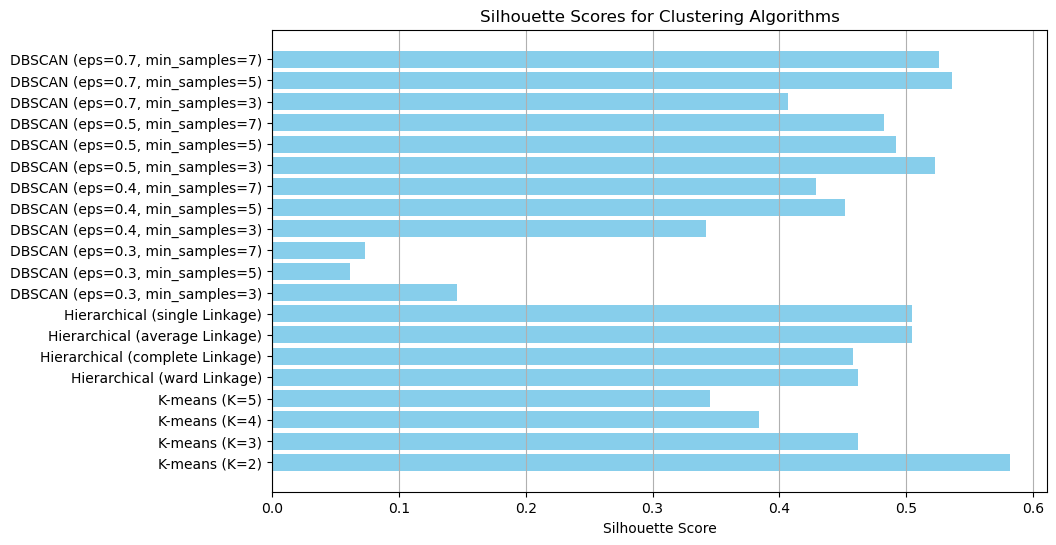

In [411]:
import matplotlib.pyplot as plt

# Extract labels and scores from silhouette_scores dictionary
labels = list(silhouette_scores.keys())
scores = list(silhouette_scores.values())

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.barh(labels, scores, color='skyblue')
plt.xlabel('Silhouette Score')
plt.title('Silhouette Scores for Clustering Algorithms')
plt.grid(axis='x')
plt.show()


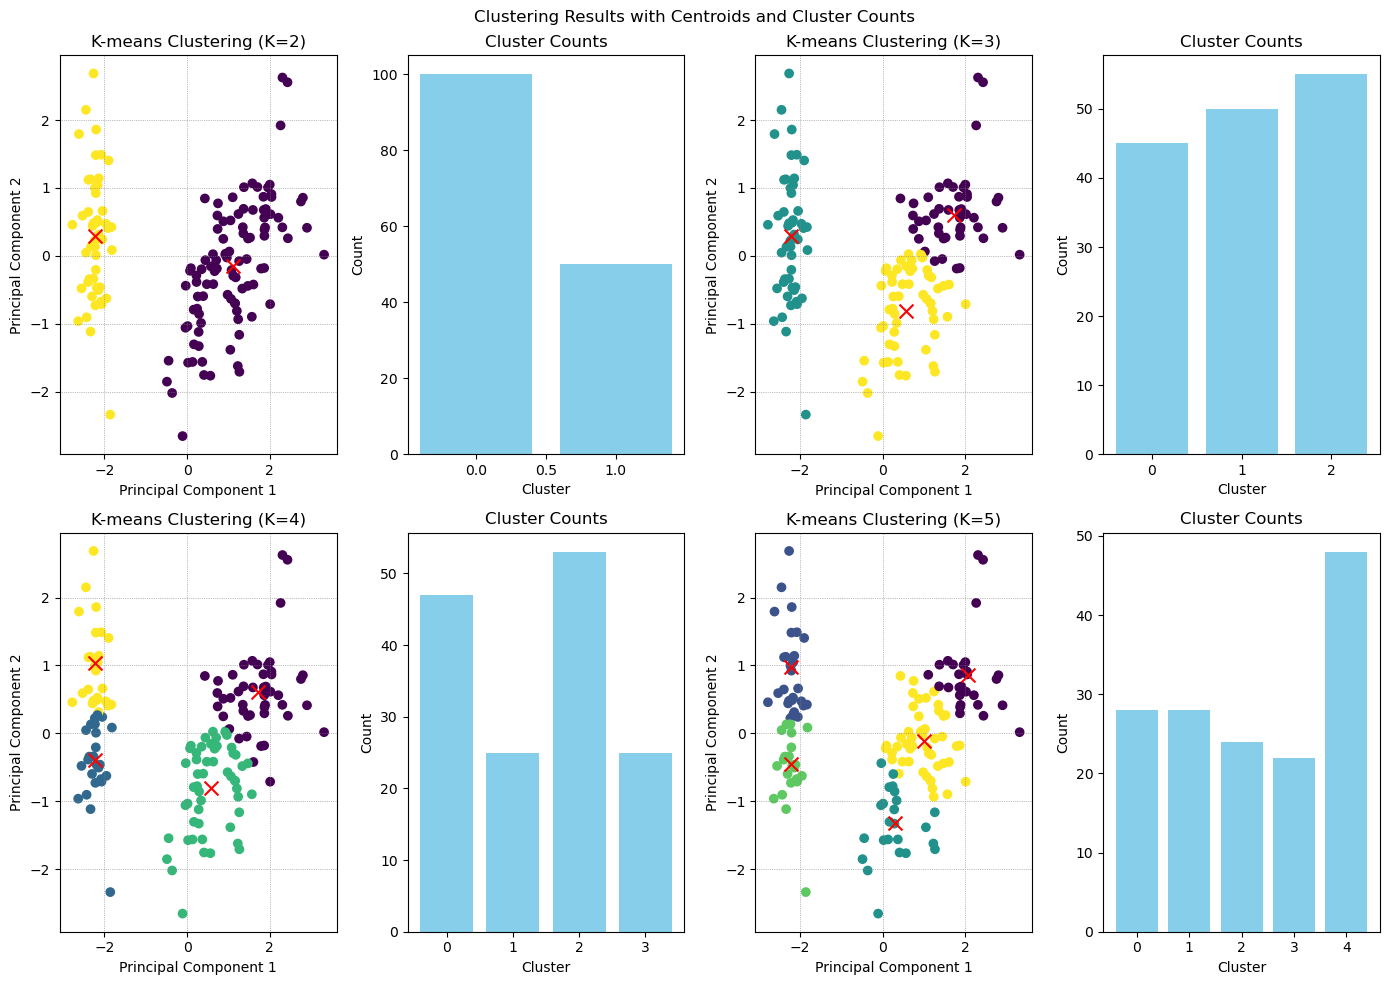

In [417]:
import numpy as np


plt.figure(figsize=(14, 5 * num_rows))  # Adjust the figure height for accommodating the bar plots
plt.suptitle('Clustering Results with Centroids and Cluster Counts')

for i, k in enumerate(k_values):
    plt.subplot(num_rows, num_cols * 2, i * 2 + 1)  # Set subplot position for scatter plot
    plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=kmeans_results[k], cmap='viridis')
    
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans.fit(iris_pca)
    
  
    centroids = kmeans.cluster_centers_
    
    
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)  # Plot centroids
    
    
    plt.title(f'K-means Clustering (K={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    
    cluster_labels, cluster_counts = np.unique(kmeans_results[k], return_counts=True)

    plt.subplot(num_rows, num_cols * 2, i * 2 + 2)  # Set subplot position for bar plot
    plt.bar(cluster_labels, cluster_counts, color='skyblue')
    plt.title('Cluster Counts')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    #plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()






In [413]:
from sklearn.metrics import silhouette_score

silhouette_scores_kmeans = {}
for k in k_values:
    silhouette_scores_kmeans[f'K-means (K={k})'] = silhouette_score(iris_scaled, kmeans_results[k])

print("K-means Clustering Silhouette Scores:")
for key, value in silhouette_scores_kmeans.items():
    print(f"{key:<30} : {value:.4f}")


K-means Clustering Silhouette Scores:
K-means (K=2)                  : 0.5818
K-means (K=3)                  : 0.4618
K-means (K=4)                  : 0.3839
K-means (K=5)                  : 0.3455


<h2>Heirarchial clustering </h2>



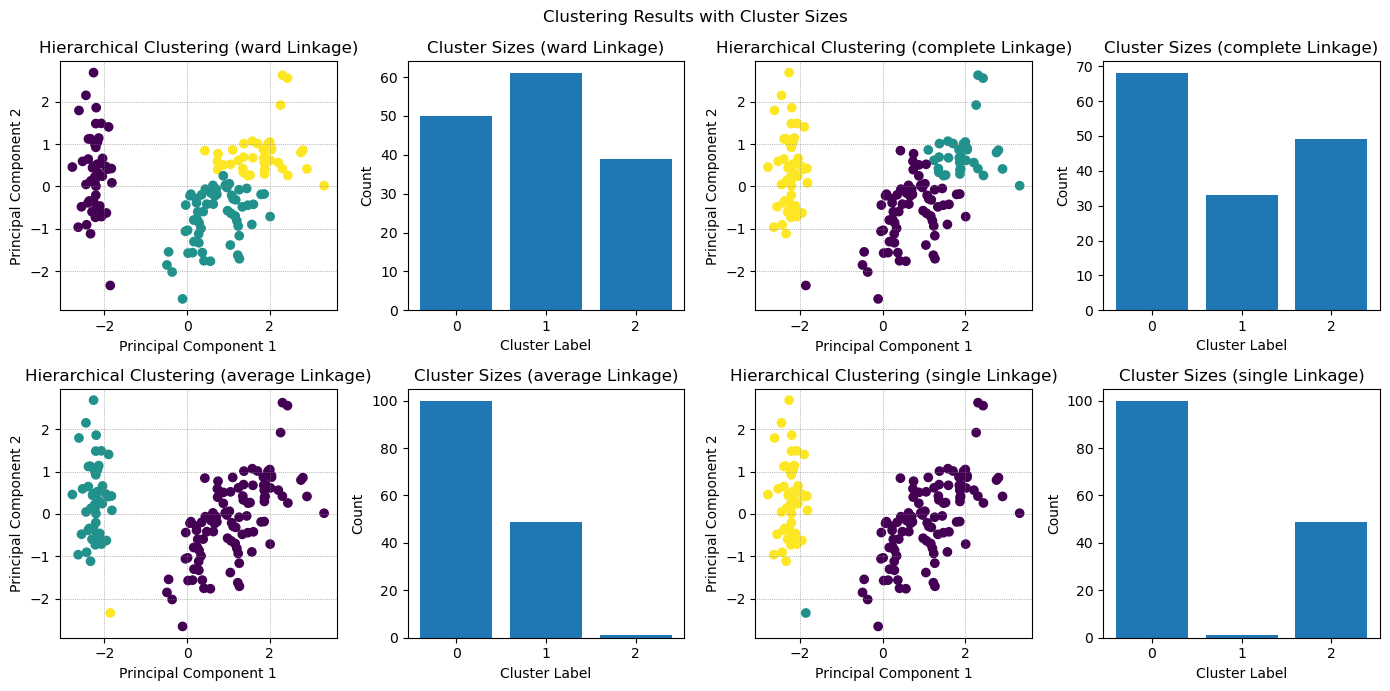

In [418]:
# This code visualizes the results of hierarchical clustering with cluster size bar plots. 
# It calculates the cluster sizes for each linkage method and then creates a subplot grid with scatter plots on the left side and corresponding bar plots on the right side. 
# Each subplot pair represents a different linkage method. The grid layout is dynamically determined based on the number of linkage methods. 
# Grid lines are added to the scatter plots for better visualization.

# Calculate cluster sizes
cluster_sizes = {}
for linkage, labels in hierarchical_results.items():
    unique_labels, counts = np.unique(labels, return_counts=True)
    cluster_sizes[linkage] = dict(zip(unique_labels, counts))


num_cols = min(len(linkage_methods), 2)  # Set maximum of 2 columns
num_rows = (len(linkage_methods) + 1) // num_cols


plt.figure(figsize=(14, 7))
plt.suptitle('Clustering Results with Cluster Sizes')

for i, linkage in enumerate(linkage_methods):
    plt.subplot(num_rows, num_cols * 2, i * 2 + 1)
    
    # Scatter plot
    plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=hierarchical_results[linkage], cmap='viridis')
    plt.title(f'Hierarchical Clustering ({linkage} Linkage)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
   
    ax = plt.subplot(num_rows, num_cols * 2, i * 2 + 2)
    labels, counts = zip(*cluster_sizes[linkage].items())
    ax.bar(labels, counts)
    ax.set_title(f'Cluster Sizes ({linkage} Linkage)')
    ax.set_xlabel('Cluster Label')
    ax.set_ylabel('Count')
    
    

plt.tight_layout()
plt.show()


<h2>DEBSCAN (Density-Based Spatial Clustering of Applications with Noise) clustering </h2>



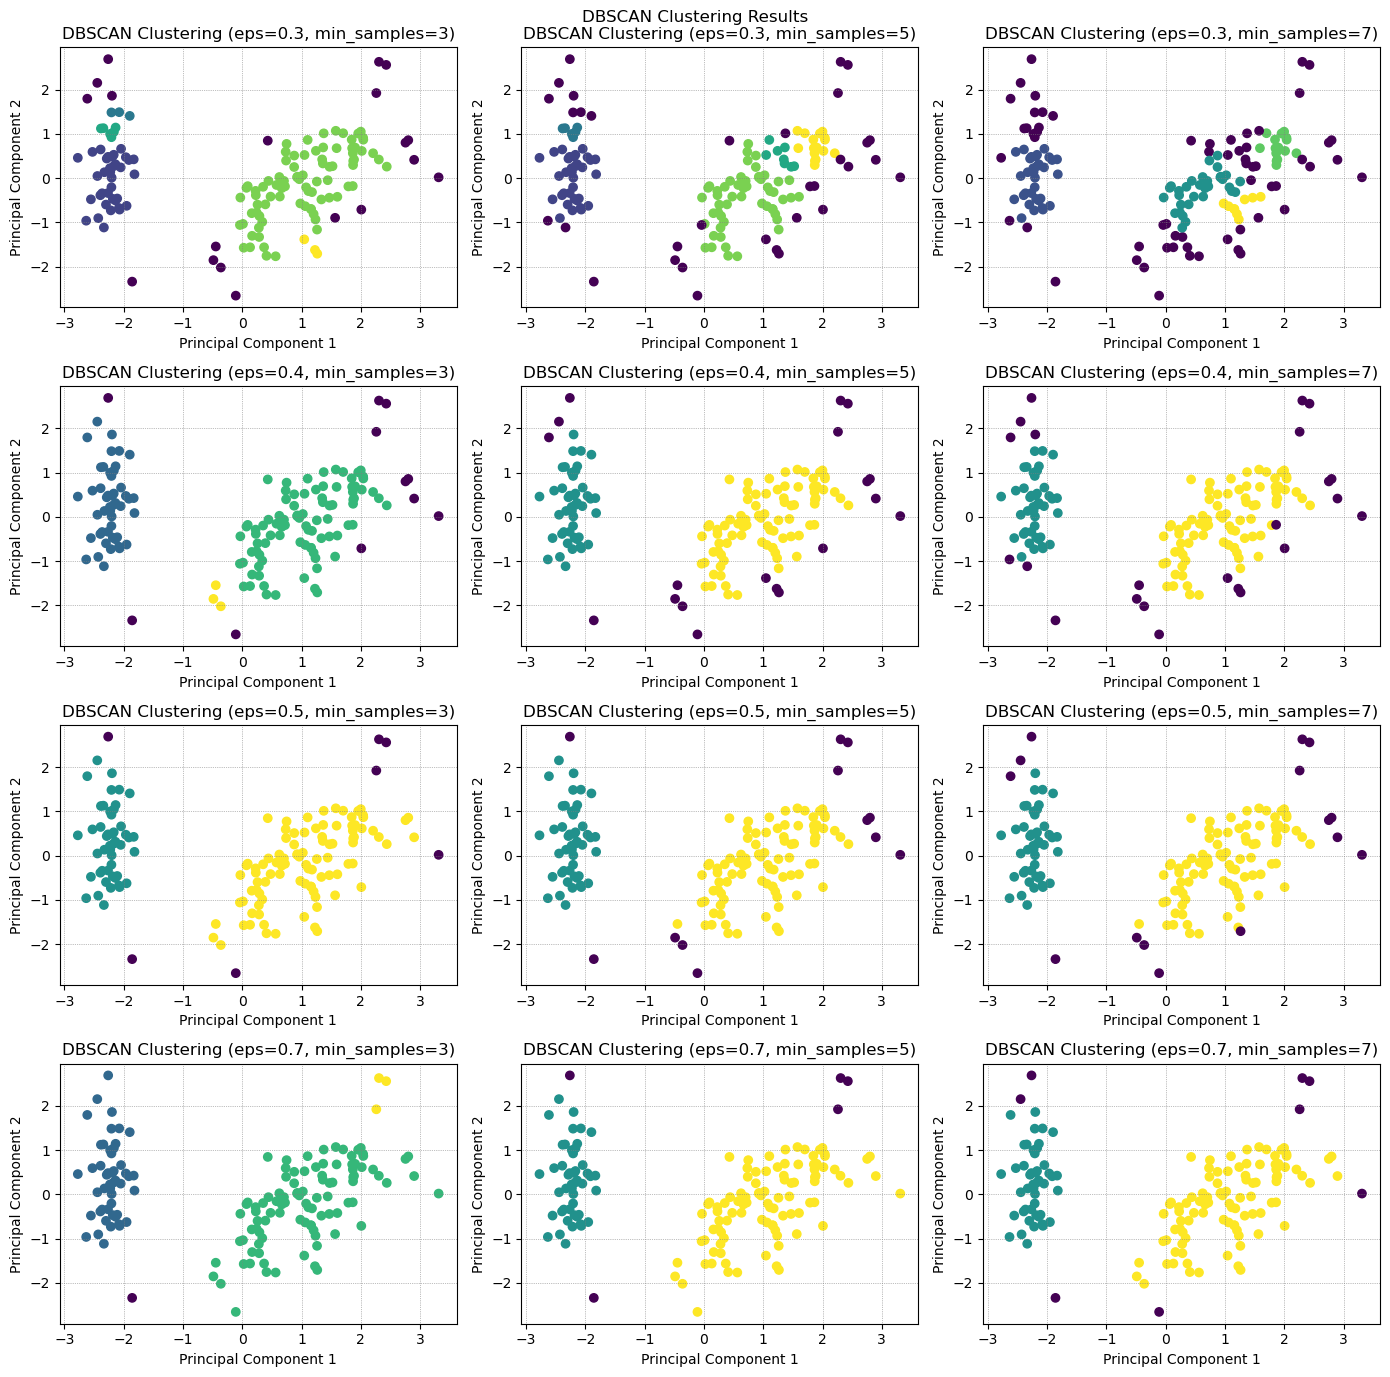

In [415]:
import numpy as np

# DBSCAN clustering
plt.figure(figsize=(14, 14))
plt.suptitle('DBSCAN Clustering Results')

num_eps = len(eps_values)
num_min_samples = len(min_samples_values)

for i, (eps, min_samples) in enumerate(dbscan_results.keys()):
    plt.subplot(num_eps, num_min_samples, i+1)
    labels = dbscan_results[(eps, min_samples)]
    if len(np.unique(labels)) > 1:
        plt.scatter(iris_pca[:, 0], iris_pca[:, 1], c=labels, cmap='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.tight_layout()
plt.show()


In [416]:
silhouette_scores_dbscan = {}
for eps, min_samples in dbscan_results.keys():
    labels = dbscan_results[(eps, min_samples)]
    if len(np.unique(labels)) > 1:  # Silhouette score is not applicable if there's only one cluster
        silhouette_scores_dbscan[f'DBSCAN (eps={eps}, min_samples={min_samples})'] = silhouette_score(iris_scaled, labels)

print("DBSCAN Clustering Silhouette Scores:")
for key, value in silhouette_scores_dbscan.items():
    print(f"{key:<50} : {value:.4f}")


DBSCAN Clustering Silhouette Scores:
DBSCAN (eps=0.3, min_samples=3)                    : 0.1460
DBSCAN (eps=0.3, min_samples=5)                    : 0.0613
DBSCAN (eps=0.3, min_samples=7)                    : 0.0733
DBSCAN (eps=0.4, min_samples=3)                    : 0.3421
DBSCAN (eps=0.4, min_samples=5)                    : 0.4514
DBSCAN (eps=0.4, min_samples=7)                    : 0.4289
DBSCAN (eps=0.5, min_samples=3)                    : 0.5226
DBSCAN (eps=0.5, min_samples=5)                    : 0.4917
DBSCAN (eps=0.5, min_samples=7)                    : 0.4827
DBSCAN (eps=0.7, min_samples=3)                    : 0.4067
DBSCAN (eps=0.7, min_samples=5)                    : 0.5361
DBSCAN (eps=0.7, min_samples=7)                    : 0.5254
